# Optimizer for MNIST

In [ ]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [ ]:
def load_data():
  (train_samples,train_labels), (test_samples,test_labels) = mnist.load_data()
  return train_samples, train_labels, test_samples, test_labels

train_samples, train_labels, test_samples, test_labels = load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# check the shape of the data
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
def convert_dtype(x):
   
    
    x_float=x.astype('float32')
    return x_float

train_samples = convert_dtype(train_samples)
test_samples = convert_dtype(test_samples)

In [ ]:
def normalize(x):
  y = (x - np.min(x))/np.ptp(x)   #ptp function is used to find the range
  return y

train_samples = normalize(train_samples)
test_samples = normalize(test_samples)

In [ ]:
# to check if train_samples is normalized or not
np.isclose(np.amax(train_samples), 1)

True

In [ ]:
# We need to reshape our train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras

def reshape(x):
    
    
    x_r=x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
    return x_r

train_samples = reshape(train_samples)
test_samples = reshape(test_samples)

In [ ]:
def oneHot(y, Ny):
    
    import tensorflow 
    from keras.utils import to_categorical
    Ny=len(np.unique(y))
    y_oh=to_categorical(y,num_classes=Ny)
    return y_oh

# example
train_labels = oneHot(train_labels, 10)
test_labels = oneHot(test_labels, 10)

In [ ]:
import tensorflow as tf
relu_model = Sequential()
relu_model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
relu_model.add(Conv2D(32, kernel_size=3, activation='relu'))
relu_model.add(Flatten())
relu_model.add(Dense(10, activation='softmax'))
relu_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01, decay= 1e-3), metrics=['accuracy'])
relu_results = relu_model.fit(train_samples, train_labels, validation_split = 0.1, epochs=4, batch_size=64)

Epoch 1/4
844/844 [==============================] - 101s 119ms/step - loss: 0.1892 - accuracy: 0.9453 - val_loss: 0.0743 - val_accuracy: 0.9793
Epoch 2/4
844/844 [==============================] - 112s 133ms/step - loss: 0.0695 - accuracy: 0.9786 - val_loss: 0.0864 - val_accuracy: 0.9758
Epoch 3/4
844/844 [==============================] - 102s 121ms/step - loss: 0.0503 - accuracy: 0.9839 - val_loss: 0.0726 - val_accuracy: 0.9808
Epoch 4/4
844/844 [==============================] - 110s 130ms/step - loss: 0.0353 - accuracy: 0.9894 - val_loss: 0.0738 - val_accuracy: 0.9833


**Adam optimizer with learning rate of 0.01 and decay of 1e-3 is providing good results for MNIST dataset as compared to other optimizers.**

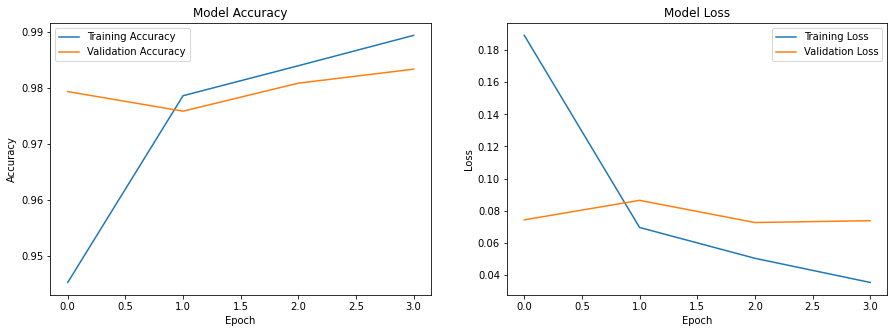

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
axs[0].plot(relu_results.history['accuracy'])
axs[0].plot(relu_results.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Training Accuracy', 'Validation Accuracy'])

axs[1].plot(relu_results.history['loss'])
axs[1].plot(relu_results.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(['Training Loss', 'Validation Loss'])

plt.show()